## Install Pakaet yang dibutuhkan 

In [1]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas as pd
from pandas.plotting import scatter_matrix
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf
import pandas as pd

tickers_list = ['A', 'AAL', 'AAPL', 'ABBV', 'ABT']

#Menenteukan Batas Data yang akan diambil  dan batas akhir datanya 
start_date = '2015-09-28'
end_date = '2030-09-30'

# Gunakan paket dari yfinance untuk mengunduh data agar lebih mudah 
# group_by='ticker'` kode ini akan menghasilkan struktur MultiIndex yang sama 
print(f"Mengunduh data untuk {tickers_list}...")
data = yf.download(tickers_list, start=start_date, end=end_date, group_by='ticker')

#Data yang dihasilkan akan memiliki struktur yang sama 
print("\n--- Data yang berhasil diunduh ---")
print(data)

print("\n--- Data spesifik untuk tanggal 2015-09-29 ---")
try:
    specific_date_data = data.loc['2015-09-29']
    print(specific_date_data)
except KeyError:
    print("Data untuk tanggal 2015-09-29 tidak ditemukan. Mungkin itu adalah hari libur bursa.")


Mengunduh data untuk ['A', 'AAL', 'AAPL', 'ABBV', 'ABT']...


[*********************100%***********************]  5 of 5 completed


--- Data yang berhasil diunduh ---
Ticker            AAL                                                   ABBV  \
Price            Open       High        Low      Close    Volume        Open   
Date                                                                           
2015-09-28  38.019602  38.315216  36.846688  37.266270   9635900   36.211962   
2015-09-29  37.237650  37.924236  36.989719  37.361618   7478800   34.714849   
2015-09-30  37.361625  37.838420  35.969386  37.027870  15823700   35.002500   
2015-10-01  36.713182  37.447446  36.083814  37.380695   9175100   35.747794   
2015-10-02  36.951569  36.970641  35.683294  36.837139  12276300   35.218248   
...               ...        ...        ...        ...       ...         ...   
2025-11-24  13.000000  13.210000  12.810000  13.100000  51235000  236.000000   
2025-11-25  13.100000  13.790000  13.100000  13.460000  67325800  230.320007   
2025-11-26  13.530000  14.110000  13.450000  13.930000  64271200  232.039993   
2025

In [3]:
data

Ticker            AAL                                                   ABBV  \
Price            Open       High        Low      Close    Volume        Open   
Date                                                                           
2015-09-28  38.019602  38.315216  36.846688  37.266270   9635900   36.211962   
2015-09-29  37.237650  37.924236  36.989719  37.361618   7478800   34.714849   
2015-09-30  37.361625  37.838420  35.969386  37.027870  15823700   35.002500   
2015-10-01  36.713182  37.447446  36.083814  37.380695   9175100   35.747794   
2015-10-02  36.951569  36.970641  35.683294  36.837139  12276300   35.218248   
...               ...        ...        ...        ...       ...         ...   
2025-11-24  13.000000  13.210000  12.810000  13.100000  51235000  236.000000   
2025-11-25  13.100000  13.790000  13.100000  13.460000  67325800  230.320007   
2025-11-26  13.530000  14.110000  13.450000  13.930000  64271200  232.039993   
2025-11-28  13.990000  14.090000  13.870000  14.050000  37355400  226.850006   
2025-12-01  13.770000  14.120000  13.560000  13.960000  75390600  227.190002   

Ticker                                                    ...           A  \
Price             High         Low       Close    Volume  ...        Open   
Date                                                      ...               
2015-09-28   36.238113   34.217984   34.322586  15123000  ...   31.482588   
2015-09-29   35.427452   33.917259   34.512184  12842800  ...   30.772310   
2015-09-30   35.630113   34.884823   35.571274  11895500  ...   31.436453   
2015-10-01   36.107364   35.257472   36.041988   9255800  ...   31.657844   
2015-10-02   36.512700   35.120185   36.493088   6942600  ...   30.606279   
...                ...         ...         ...       ...  ...         ...   
2025-11-24  237.619995  228.479996  229.509995  10225900  ...  151.899994   
2025-11-25  234.080002  230.309998  231.800003   7134100  ...  150.779999   
2025-11-26  232.479996  226.639999  227.660004   5920800  ...  155.740005   
2025-11-28  228.089996  225.509995  227.699997   2655600  ...  154.110001   
2025-12-01  229.490005  223.979996  225.110001   5208300  ...  152.539993   

Ticker                                                         AAPL  \
Price             High         Low       Close   Volume        Open   
Date                                                                  
2015-09-28   31.611728   30.735417   30.781538  2615400   25.560229   
2015-09-29   31.418013   30.661619   31.122835  2252400   25.331227   
2015-09-30   31.759303   31.058253   31.667061  2545700   24.734035   
2015-10-01   31.805432   30.883001   31.122835  3011400   24.487082   
2015-10-02   31.989926   30.550931   31.980700  3519400   24.249108   
...                ...         ...         ...      ...         ...   
2025-11-24  153.600006  150.470001  153.600006  3984500  270.899994   
2025-11-25  160.270004  148.000000  157.199997  3698000  275.269989   
2025-11-26  158.119995  154.020004  154.369995  3294300  276.959991   
2025-11-28  154.559998  153.220001  153.500000  1531600  277.260010   
2025-12-01  153.949997  149.190002  150.100006  2043900  278.010010   

Ticker                                                     
Price             High         Low       Close     Volume  
Date                                                       
2015-09-28   25.721875   25.243673   25.243673  208436000  
2015-09-29   25.483892   24.215422   24.484831  293461600  
2015-09-30   25.041611   24.410744   24.763222  265892000  
2015-10-01   24.610562   24.091948   24.601582  255716400  
2015-10-02   24.922632   24.145835   24.781191  232079200  
...                ...         ...         ...        ...  
2025-11-24  277.000000  270.899994  275.920013   65585800  
2025-11-25  280.380005  275.250000  276.970001   46914200  
2025-11-26  279.529999  276.630005  277.549988   33431400  
2025-11-28  279.000000  275.989990  278.850006   20135600  
2025-12-01  283.420013  2

In [4]:
# Asumsi 'df_original' adalah DataFrame Anda dengan multi-level header
# Gabungkan dua level header menjadi satu: Ticker_Price (misalnya, 'A_Open', 'AAL_Open')
new_cols = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in data.columns]
data.columns = new_cols
# Atur kolom 'Date' sebagai kolom penentu
data = data.rename(columns={'Date': 'Date'})

In [5]:
stacked_data =data.stack()

Ticker          AAL         ABBV          ABT            A         AAPL
count   2560.000000  2560.000000  2560.000000  2560.000000  2560.000000
mean      25.187810   100.131363    82.882605    95.971859   110.646325
std       12.980146    51.208885    31.399808    38.232685    72.534020
min        9.040000    31.848406    30.290819    30.781538    20.604080
25%       13.870000    59.574080    53.143054    62.810263    40.635557
50%       19.639999    82.568516    92.664791   101.637268   115.213581
75%       36.595053   137.551788   108.368248   130.455803   170.139328
max       56.988724   242.630859   138.334625   174.067627   283.100006


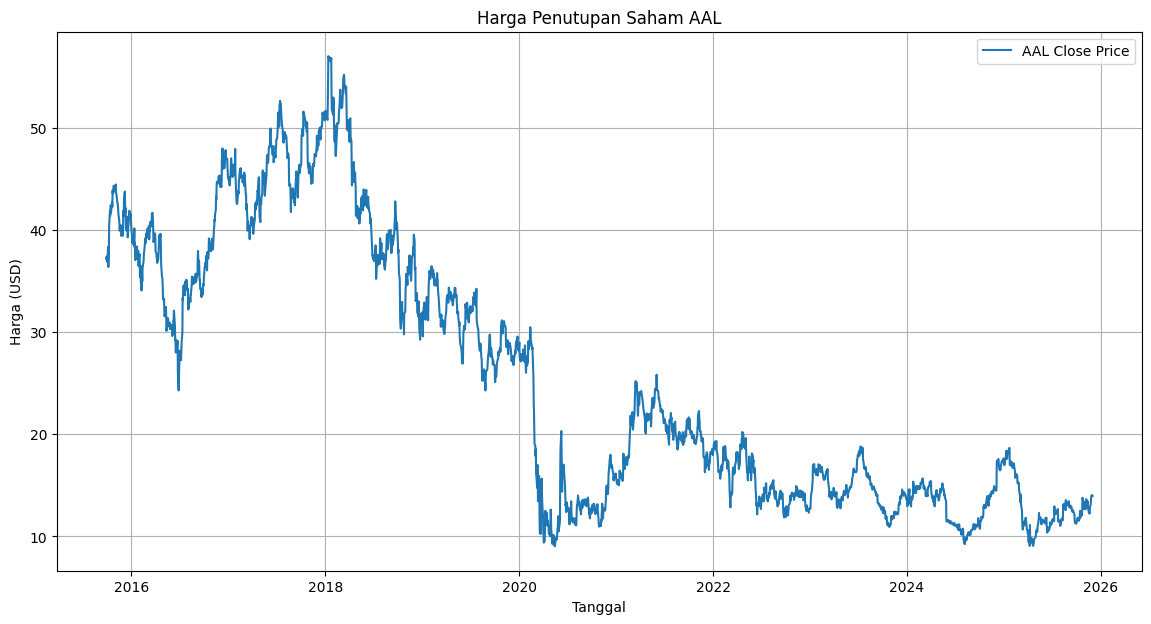

In [6]:
import matplotlib.pyplot as plt
# Pilih hanya kolom 'Close' untuk semua ticker
df_unstacked = stacked_data.unstack()

# Langkah 2 (Opsional tapi sangat direkomendasikan): Buat kolom multi-level agar lebih terstruktur
# Pisahkan nama ticker dan metrik dari nama kolom
new_columns = [col.split('_', 1) for col in df_unstacked.columns]
df_unstacked.columns = pd.MultiIndex.from_tuples(new_columns, names=['Ticker', 'Metric'])
close_prices = df_unstacked.xs('Close', level='Metric', axis=1)

# Tampilkan statistik deskriptif
print(close_prices.describe())

# Plot harga penutupan untuk saham AAL
plt.figure(figsize=(14, 7))
plt.plot(close_prices.index, close_prices['AAL'], label='AAL Close Price')
plt.title('Harga Penutupan Saham AAL')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
data.columns

Index(['AAL_Open', 'AAL_High', 'AAL_Low', 'AAL_Close', 'AAL_Volume',
       'ABBV_Open', 'ABBV_High', 'ABBV_Low', 'ABBV_Close', 'ABBV_Volume',
       'ABT_Open', 'ABT_High', 'ABT_Low', 'ABT_Close', 'ABT_Volume', 'A_Open',
       'A_High', 'A_Low', 'A_Close', 'A_Volume', 'AAPL_Open', 'AAPL_High',
       'AAPL_Low', 'AAPL_Close', 'AAPL_Volume'],
      dtype='object')

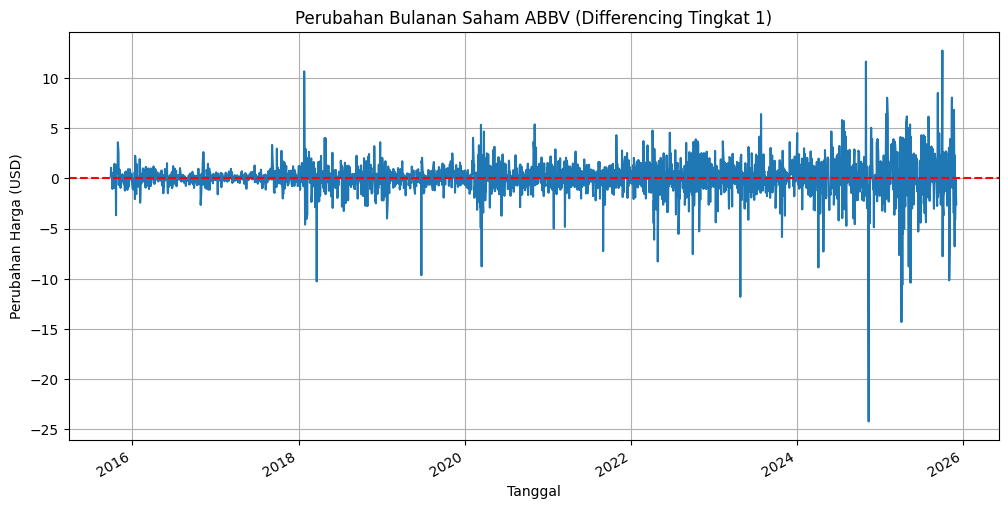

In [8]:
# Membuat plot
data_return_saham = data['ABBV_Close'].diff(periods=1)
plt.figure(figsize=(12, 6))
data_return_saham.plot(title='Perubahan Bulanan Saham ABBV (Differencing Tingkat 1)', grid=True)
plt.xlabel('Tanggal')
plt.ylabel('Perubahan Harga (USD)')
plt.axhline(0, color='red', linestyle='--') # Garis referensi pada nol
plt.show()

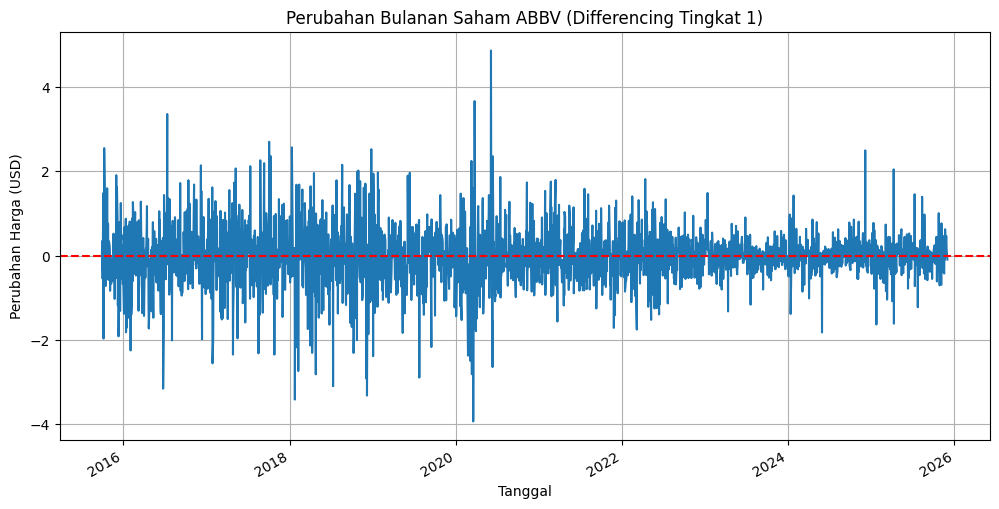

In [9]:
# Membuat plot
data_return_saham = data['AAL_Close'].diff(periods=1)
plt.figure(figsize=(12, 6))
data_return_saham.plot(title='Perubahan Bulanan Saham ABBV (Differencing Tingkat 1)', grid=True)
plt.xlabel('Tanggal')
plt.ylabel('Perubahan Harga (USD)')
plt.axhline(0, color='red', linestyle='--') # Garis referensi pada nol
plt.show()

In [10]:
import yfinance as yf
import pandas as pd

# Daftar ticker untuk mata uang kripto terkenal
# Format yang digunakan yfinance adalah 'TICKER-USD'
crypto_tickers = [
    'BTC-USD',  # Bitcoin
    'ETH-USD',  # Ethereum
    'USDT-USD', # Tether
    'BNB-USD',  # Binance Coin
    'SOL-USD',  # Solana
    'XRP-USD',  # XRP
    'USDC-USD', # USD Coin
    'ADA-USD',  # Cardano
    'DOGE-USD', # Dogecoin
    'AVAX-USD', # Avalanche
    'DOT-USD'   # Polkadot
]

# Menentukan Batas Data yang akan diambil dan batas akhir datanya 
start_date = '2021-09-28'
end_date = '2025-09-30'  # yfinance akan mengambil data hingga hari terakhir yang tersedia

# Gunakan paket dari yfinance untuk mengunduh data agar lebih mudah 
# `group_by='ticker'` kode ini akan menghasilkan struktur MultiIndex yang sama 
print(f"Mengunduh data untuk {crypto_tickers}...")
df = yf.download(crypto_tickers, start=start_date, end=end_date, group_by='ticker')

# Data yang dihasilkan akan memiliki struktur yang sama 
print("\n--- Data yang berhasil diunduh ---")
print(data)

print("\n--- Data spesifik untuk tanggal 2015-09-29 ---")
try:
    specific_date_data = data.loc['2015-09-29']
    print(specific_date_data)
except KeyError:
    print("Data untuk tanggal 2015-09-29 tidak ditemukan. Mungkin data untuk aset kripto tertentu belum tersedia pada tanggal tersebut.")


Mengunduh data untuk ['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD', 'USDC-USD', 'ADA-USD', 'DOGE-USD', 'AVAX-USD', 'DOT-USD']...


[*********************100%***********************]  11 of 11 completed



--- Data yang berhasil diunduh ---
             AAL_Open   AAL_High    AAL_Low  AAL_Close  AAL_Volume  \
Date                                                                 
2015-09-28  38.019602  38.315216  36.846688  37.266270     9635900   
2015-09-29  37.237650  37.924236  36.989719  37.361618     7478800   
2015-09-30  37.361625  37.838420  35.969386  37.027870    15823700   
2015-10-01  36.713182  37.447446  36.083814  37.380695     9175100   
2015-10-02  36.951569  36.970641  35.683294  36.837139    12276300   
...               ...        ...        ...        ...         ...   
2025-11-24  13.000000  13.210000  12.810000  13.100000    51235000   
2025-11-25  13.100000  13.790000  13.100000  13.460000    67325800   
2025-11-26  13.530000  14.110000  13.450000  13.930000    64271200   
2025-11-28  13.990000  14.090000  13.870000  14.050000    37355400   
2025-12-01  13.770000  14.120000  13.560000  13.960000    75390600   

             ABBV_Open   ABBV_High    ABBV_Low  ABBV_

In [11]:
# Asumsi 'df_original' adalah DataFrame Anda dengan multi-level header
# Gabungkan dua level header menjadi satu: Ticker_Price (misalnya, 'A_Open', 'AAL_Open')
new_cols = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in df.columns]
df.columns = new_cols
# Atur kolom 'Date' sebagai kolom penentu
df = df.rename(columns={'Date': 'Date'})

In [12]:
df.columns

Index(['DOGE-USD_Open', 'DOGE-USD_High', 'DOGE-USD_Low', 'DOGE-USD_Close',
       'DOGE-USD_Volume', 'USDC-USD_Open', 'USDC-USD_High', 'USDC-USD_Low',
       'USDC-USD_Close', 'USDC-USD_Volume', 'USDT-USD_Open', 'USDT-USD_High',
       'USDT-USD_Low', 'USDT-USD_Close', 'USDT-USD_Volume', 'ETH-USD_Open',
       'ETH-USD_High', 'ETH-USD_Low', 'ETH-USD_Close', 'ETH-USD_Volume',
       'DOT-USD_Open', 'DOT-USD_High', 'DOT-USD_Low', 'DOT-USD_Close',
       'DOT-USD_Volume', 'BTC-USD_Open', 'BTC-USD_High', 'BTC-USD_Low',
       'BTC-USD_Close', 'BTC-USD_Volume', 'AVAX-USD_Open', 'AVAX-USD_High',
       'AVAX-USD_Low', 'AVAX-USD_Close', 'AVAX-USD_Volume', 'ADA-USD_Open',
       'ADA-USD_High', 'ADA-USD_Low', 'ADA-USD_Close', 'ADA-USD_Volume',
       'BNB-USD_Open', 'BNB-USD_High', 'BNB-USD_Low', 'BNB-USD_Close',
       'BNB-USD_Volume', 'XRP-USD_Open', 'XRP-USD_High', 'XRP-USD_Low',
       'XRP-USD_Close', 'XRP-USD_Volume', 'SOL-USD_Open', 'SOL-USD_High',
       'SOL-USD_Low', 'SOL-USD_Close'

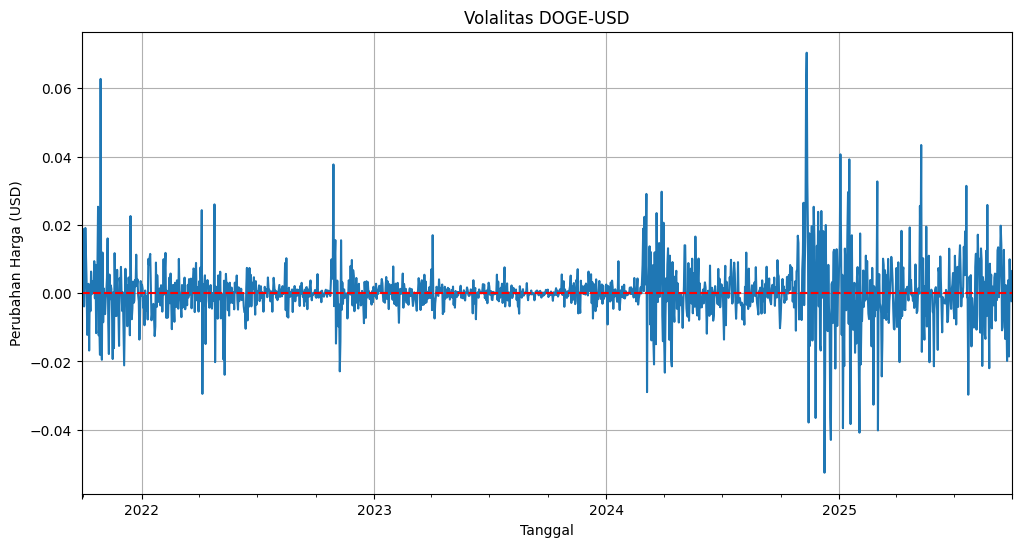

In [13]:
# Membuat plot
df_return_saham = df['DOGE-USD_Close'].diff(periods=1)
plt.figure(figsize=(12, 6))
df_return_saham.plot(title='Volalitas DOGE-USD', grid=True)
plt.xlabel('Tanggal')
plt.ylabel('Perubahan Harga (USD)')
plt.axhline(0, color='red', linestyle='--') # Garis referensi pada nol
plt.show()

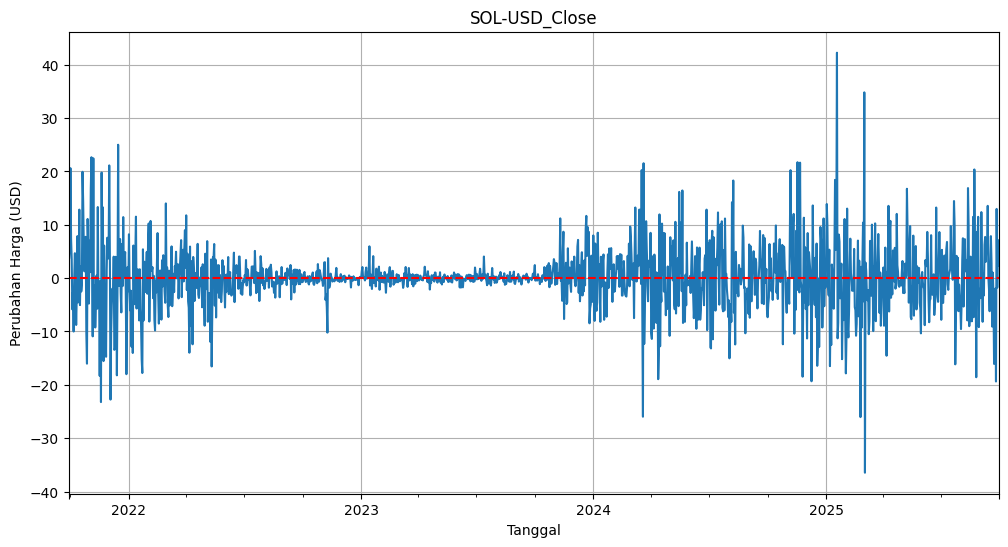

In [14]:
# Membuat plot
data_return_saham = df['SOL-USD_Close'].diff(periods=1)
plt.figure(figsize=(12, 6))
data_return_saham.plot(title='SOL-USD_Close', grid=True)
plt.xlabel('Tanggal')
plt.ylabel('Perubahan Harga (USD)')
plt.axhline(0, color='red', linestyle='--') # Garis referensi pada nol
plt.show()

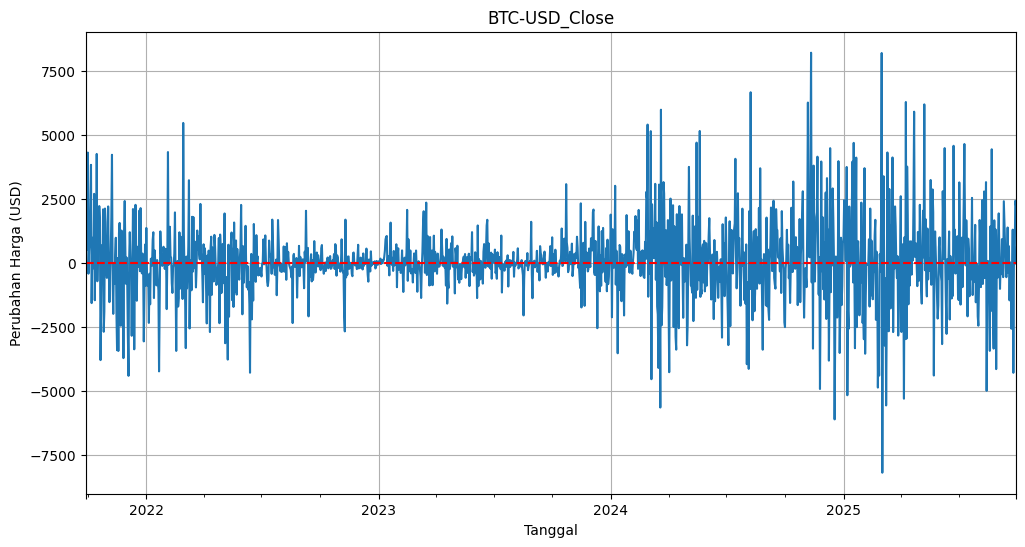

In [15]:
# Membuat plot
df_return_saham = df['BTC-USD_Close'].diff(periods=1)
plt.figure(figsize=(12, 6))
df_return_saham.plot(title='BTC-USD_Close', grid=True)
plt.xlabel('Tanggal')
plt.ylabel('Perubahan Harga (USD)')
plt.axhline(0, color='red', linestyle='--') # Garis referensi pada nol
plt.show()

Volatilitas harga harian Bitcoin dalam nilai Dolar AS ($) telah menurun secara substansial dari tahun 2022 hingga 2023 selanjutnya terjadi volalitas yang staknnansi pada periode sekitar oktober 2022 sampai sekitar oktober 2024 selanjutnya  pada periode selanjutnya menunjukkan periode pergerakan pasar yang sangat cepat dan dramatis.

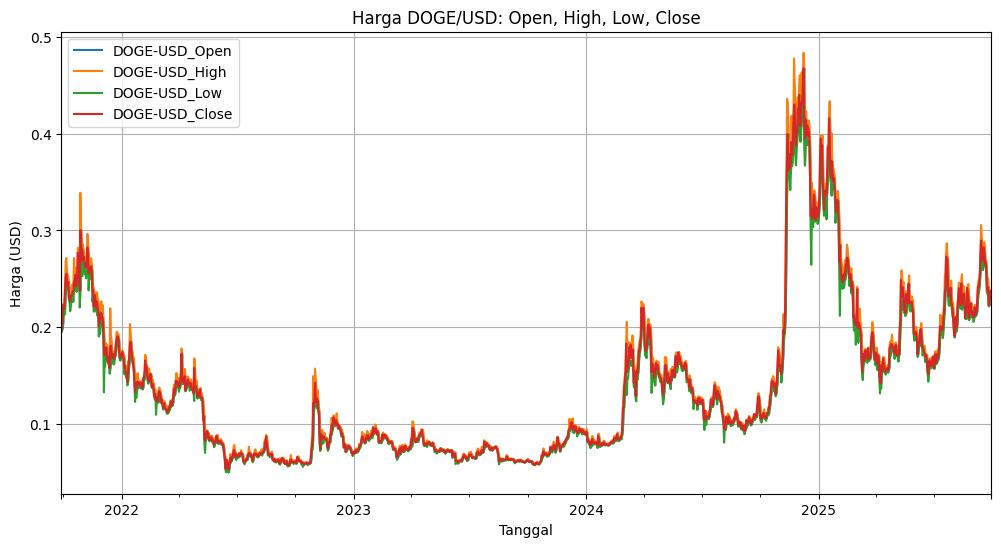

In [16]:
# 1. Pilih kolom yang ingin di-plot
columns_to_plot = [
    'DOGE-USD_Open',
    'DOGE-USD_High',
    'DOGE-USD_Low',
    'DOGE-USD_Close'
]

# 2. Buat plot
df[columns_to_plot].plot(
    figsize=(12, 6),      # Atur ukuran plot (lebar, tinggi)
    title='Harga DOGE/USD: Open, High, Low, Close'
)

# 3. Tampilkan plot
plt.xlabel("Tanggal")   # Label sumbu X
plt.ylabel("Harga (USD)") # Label sumbu Y
plt.grid(True)
plt.legend(loc='best')
plt.show()

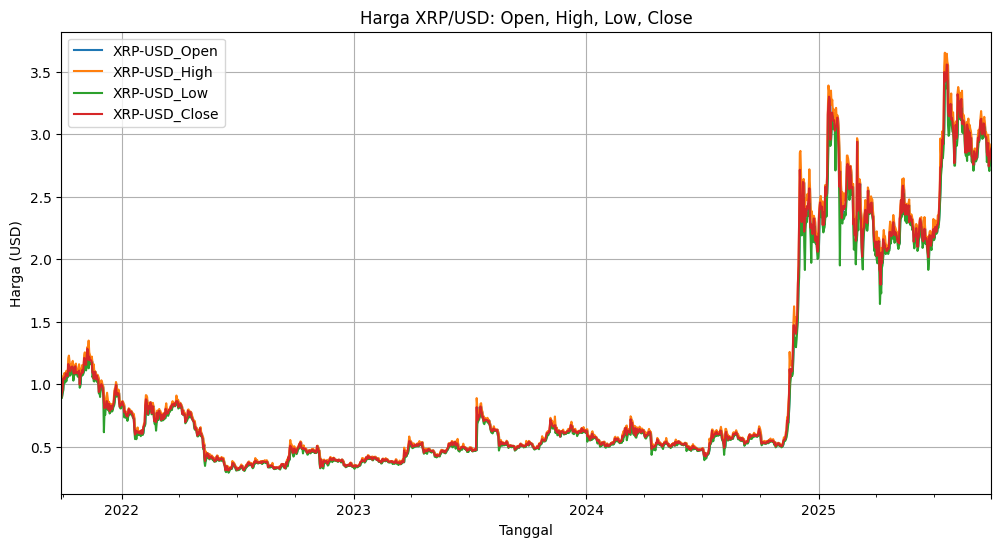

In [17]:
# 1. Pilih kolom yang ingin di-plot
columns_to_plot = [
    'XRP-USD_Open', 'XRP-USD_High', 'XRP-USD_Low',
       'XRP-USD_Close'
]

# 2. Buat plot
df[columns_to_plot].plot(
    figsize=(12, 6),      # Atur ukuran plot (lebar, tinggi)
    title='Harga XRP/USD: Open, High, Low, Close'
)

# 3. Tampilkan plot
plt.xlabel("Tanggal")   # Label sumbu X
plt.ylabel("Harga (USD)") # Label sumbu Y
plt.grid(True)
plt.legend(loc='best')
plt.show()

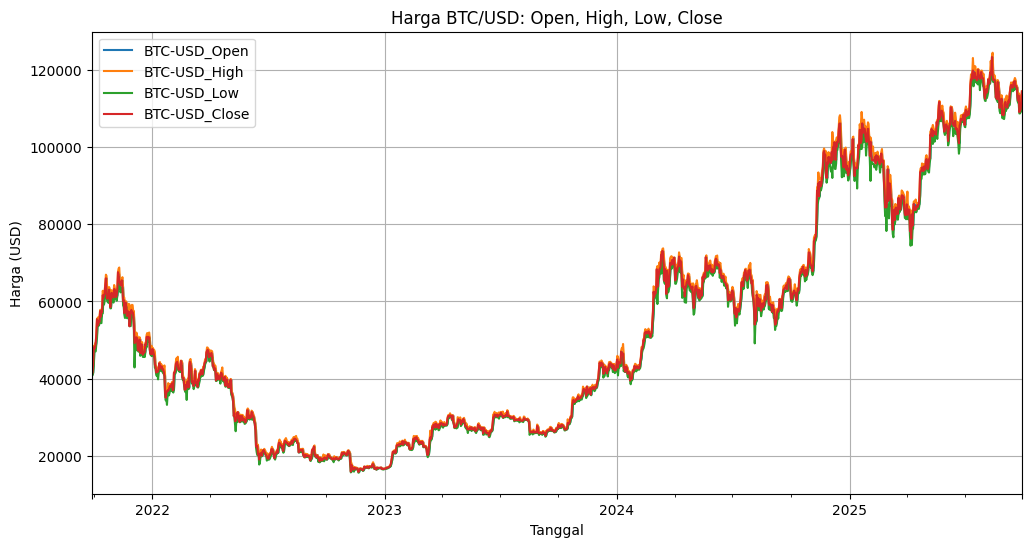

In [18]:
# 1. Pilih kolom yang ingin di-plot
columns_to_plot = [
    'BTC-USD_Open', 'BTC-USD_High',
       'BTC-USD_Low', 'BTC-USD_Close'
]

# 2. Buat plot
df[columns_to_plot].plot(
    figsize=(12, 6),      # Atur ukuran plot (lebar, tinggi)
    title='Harga BTC/USD: Open, High, Low, Close'
)

# 3. Tampilkan plot
plt.xlabel("Tanggal")   # Label sumbu X
plt.ylabel("Harga (USD)") # Label sumbu Y
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [19]:
df[[ 'BTC-USD_Open', 'BTC-USD_High',
       'BTC-USD_Low', 'BTC-USD_Close']].describe()

,BTC-USD_Open,BTC-USD_High,BTC-USD_Low,BTC-USD_Close
count,1463.000000,1463.000000,1463.000000,1463.000000
mean,53296.005060,54264.212118,52310.436197,53342.399926
std,30096.917299,30550.512470,29635.455210,30137.735712
min,15782.300781,16253.047852,15599.046875,15787.284180
25%,27284.480469,27789.819336,26853.679688,27287.087891
50%,43816.742188,44353.285156,42807.835938,43840.285156
75%,68949.554688,70023.238281,67497.640625,69010.746094
max,123339.398438,124457.117188,118959.195312,123344.062500


<Axes: ylabel='Frequency'>

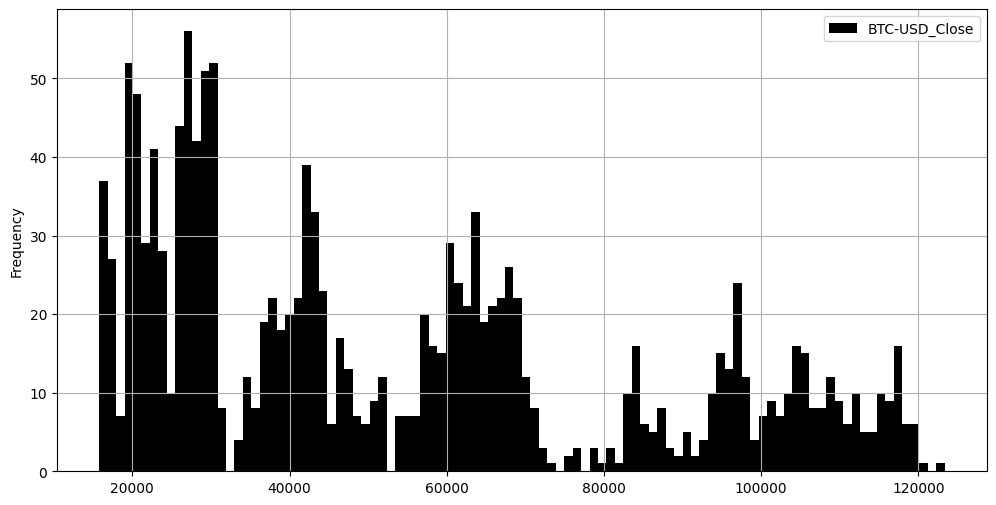

In [20]:
df[[ 'BTC-USD_Close']].plot(kind='hist', bins=100,
figsize=(12,6), color='black', grid=True)

Dari Tabel Diatas Bitcoin menghabiskan sebagian besar waktunya di harga penutupan  di bawah 30.000, dan jauh lebih jarang mencapai atau menutup di atas level 70.000 atau 100.000.

<Axes: >

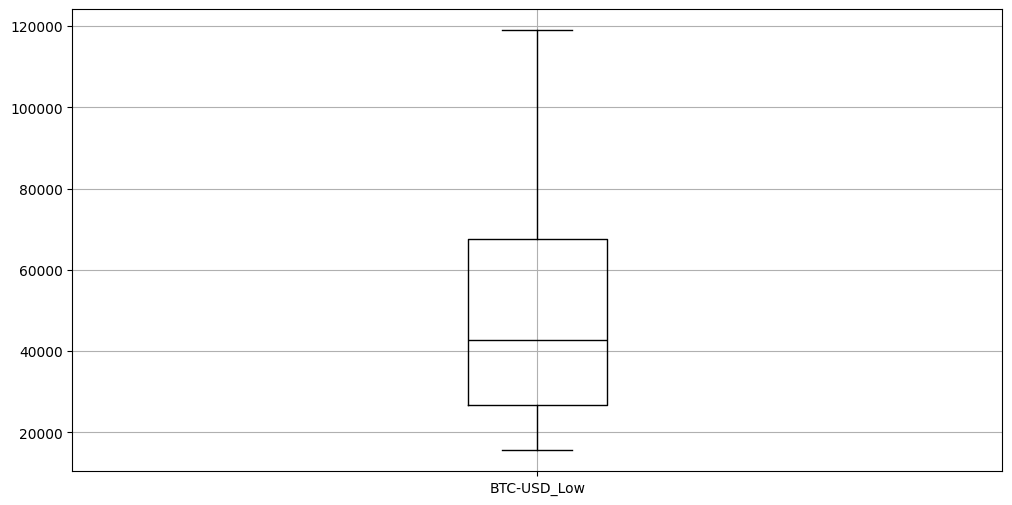

In [21]:
df[['BTC-USD_Low']].plot(kind='box',
figsize=(12,6), color='black', grid=True)

array([[<Axes: xlabel='BTC-USD_Open', ylabel='BTC-USD_Open'>,
        <Axes: xlabel='BTC-USD_High', ylabel='BTC-USD_Open'>,
        <Axes: xlabel='BTC-USD_Low', ylabel='BTC-USD_Open'>,
        <Axes: xlabel='BTC-USD_Close', ylabel='BTC-USD_Open'>],
       [<Axes: xlabel='BTC-USD_Open', ylabel='BTC-USD_High'>,
        <Axes: xlabel='BTC-USD_High', ylabel='BTC-USD_High'>,
        <Axes: xlabel='BTC-USD_Low', ylabel='BTC-USD_High'>,
        <Axes: xlabel='BTC-USD_Close', ylabel='BTC-USD_High'>],
       [<Axes: xlabel='BTC-USD_Open', ylabel='BTC-USD_Low'>,
        <Axes: xlabel='BTC-USD_High', ylabel='BTC-USD_Low'>,
        <Axes: xlabel='BTC-USD_Low', ylabel='BTC-USD_Low'>,
        <Axes: xlabel='BTC-USD_Close', ylabel='BTC-USD_Low'>],
       [<Axes: xlabel='BTC-USD_Open', ylabel='BTC-USD_Close'>,
        <Axes: xlabel='BTC-USD_High', ylabel='BTC-USD_Close'>,
        <Axes: xlabel='BTC-USD_Low', ylabel='BTC-USD_Close'>,
        <Axes: xlabel='BTC-USD_Close', ylabel='BTC-USD_Close'>]],
   

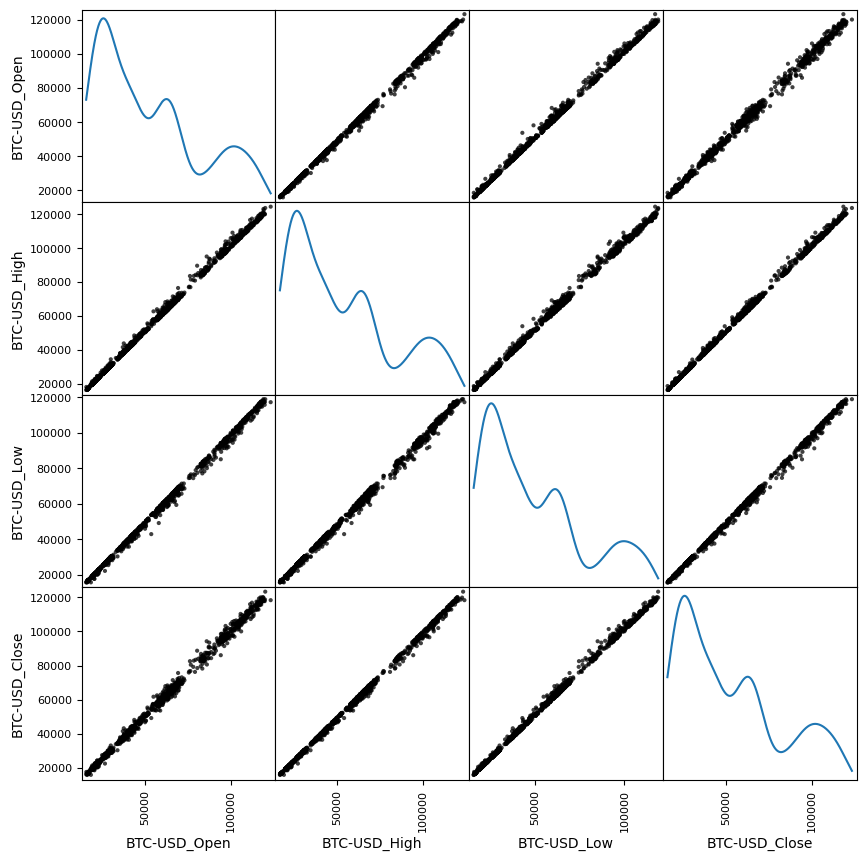

In [22]:


# Memastikan hanya kolom harga yang di-plot
scatter_matrix(
    df[['BTC-USD_Open', 'BTC-USD_High',
       'BTC-USD_Low', 'BTC-USD_Close']],
    figsize=(10, 10),
    color='black',
    alpha=0.75,
    diagonal='kde',
    grid=True
)

In [23]:
df_olah = df[['ETH-USD_Close','DOT-USD_Close','SOL-USD_Close', 'DOGE-USD_Close','BTC-USD_Close','BNB-USD_Close']]
df_olah

,ETH-USD_Close,DOT-USD_Close,SOL-USD_Close,DOGE-USD_Close,BTC-USD_Close,BNB-USD_Close
Date,,,,,,
2021-09-28,2807.296631,26.333828,131.537216,0.196804,41034.542969,333.032593
2021-09-29,2853.143311,27.274256,135.351456,0.198876,41564.363281,367.989594
2021-09-30,3001.678955,28.580620,141.069046,0.204244,43790.894531,387.057343
2021-10-01,3307.516113,31.968777,161.682373,0.223010,48116.941406,421.643188
2021-10-02,3391.694336,32.122108,169.093018,0.219133,47711.488281,428.098328
...,...,...,...,...,...,...
2025-09-25,3868.333984,3.800548,192.380768,0.222706,109049.289062,945.713623
2025-09-26,4035.887939,3.927708,205.352554,0.232629,109712.828125,960.923950
2025-09-27,4018.658203,3.892598,203.583328,0.230836,109681.945312,968.789551


<Axes: >

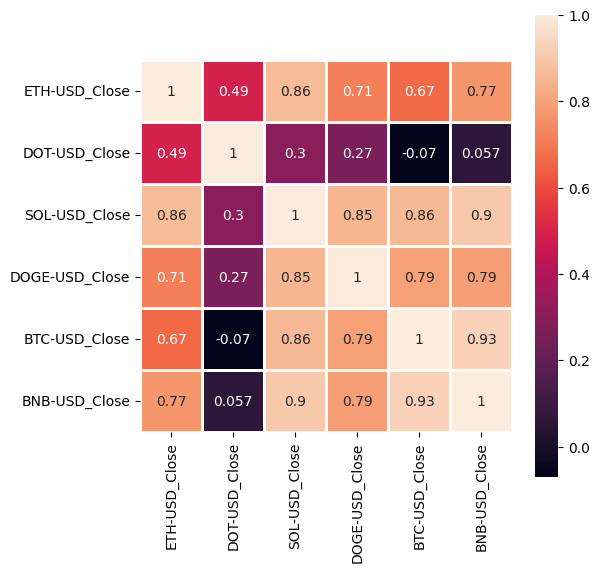

In [24]:
import seaborn as sn
plt.figure(figsize=(6,6))
sn.heatmap(df_olah.corr(), annot=True, square=True,
linewidths=2)

Mayoritas aset kripto dalam heatmap korelasi ini menunjukkan **korelasi positif yang sangat kuat** (nilai $r$ mendekati +1), terutama antara **BTC-USD, ETH-USD, SOL-USD, dan BNB-USD**, yang berarti aset-aset ini cenderung bergerak bersamaan; misalnya, korelasi **BTC-USD dengan BNB-USD** mencapai $0.93$. Korelasi tinggi ini mengindikasikan bahwa portofolio yang terdiri dari aset-aset ini memiliki **diversifikasi yang rendah** karena semuanya akan terpengaruh secara serupa oleh pergerakan pasar secara keseluruhan. Namun, **DOT-USD** menunjukkan korelasi yang jauh lebih lemah dengan aset-aset lain, bahkan sedikit negatif dengan **BTC-USD ($\mathbf{-0.07}$)**, menjadikannya aset yang berpotensi memberikan **diversifikasi** yang lebih baik karena pergerakannya yang cenderung independen.

In [25]:
import dtale
dtale.show(df_olah)

In [26]:
dtale.show(df_olah, ignore_duplicate=True)

In [27]:
df_olah.columns

Index(['ETH-USD_Close', 'DOT-USD_Close', 'SOL-USD_Close', 'DOGE-USD_Close',
       'BTC-USD_Close', 'BNB-USD_Close'],
      dtype='object')

In [28]:
df_olah[(df_olah['ETH-USD_Close'] > 3000) & (df_olah['ETH-USD_Close'] <= 4000)]

,ETH-USD_Close,DOT-USD_Close,SOL-USD_Close,DOGE-USD_Close,BTC-USD_Close,BNB-USD_Close
Date,,,,,,
2021-09-30,3001.678955,28.580620,141.069046,0.204244,43790.894531,387.057343
2021-10-01,3307.516113,31.968777,161.682373,0.223010,48116.941406,421.643188
2021-10-02,3391.694336,32.122108,169.093018,0.219133,47711.488281,428.098328
2021-10-03,3418.358643,32.105255,172.589157,0.221748,48199.953125,430.508820
2021-10-04,3380.089111,31.042126,166.731918,0.240852,49112.902344,425.748901
...,...,...,...,...,...,...
2025-08-04,3718.986084,3.719923,169.425690,0.210413,115071.882812,769.059082
2025-08-05,3611.899414,3.618730,164.096436,0.199739,114141.445312,754.851013
2025-08-06,3683.920654,3.673978,168.175735,0.205255,115028.000000,769.847839


In [29]:
import pmdarima as pm


Address already in use
Port 40000 is in use by another program. Either identify and stop that program, or start the server with a different port.
2025-12-02 19:52:19,440 - ERROR    - 1
Traceback (most recent call last):
  File "/home/kevinpnjt/env/lib/python3.12/site-packages/werkzeug/serving.py", line 760, in __init__
    self.server_activate()
  File "/usr/local/lib/python3.12/socketserver.py", line 487, in server_activate
    self.socket.listen(self.request_queue_size)
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kevinpnjt/env/lib/python3.12/site-packages/dtale/app.py", line 885, in _start
    app.run(
  File "/home/kevinpnjt/env/lib/python3.12/site-packages/dtale/app.py", line 225, in run
    super(DtaleFlask, self).run(
  File "/home/kevinpnjt/env/lib/python3.12/site-packages/flask/app.py", line 625, in run
    run_simple(t.cast(str, host), port, self, **options)
  

In [30]:
model = pm.auto_arima(df_olah['ETH-USD_Close'], seasonal=True,
stepwise=True, m=12)
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 1463
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -8731.924
Date:                              Tue, 02 Dec 2025   AIC                          17477.847
Time:                                      19:59:18   BIC                          17514.860
Sample:                                  09-28-2021   HQIC                         17491.654
                                       - 09-29-2025                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2638      0.017    -73.074      0.000      -1.298      -1.230
ar.L2         -0.97